# ML Homework 4

# Create and plot data

In [1]:
import numpy as np

#Create data n = 1000 with gaussian distribution 
mu, sigma, n = 0, 1, 1000 # mean, standard deviation and data size
x = np.random.normal(mu, sigma, n)
noiseLevel = 0.1;
noise = np.random.normal(-noiseLevel, noiseLevel, n);
b0 = 1
b1 = 10 #alpha
y = np.log(b1*x**2 + b0) + noise

#We get rid of log to minimize complexity and make our dimension mapping
y_new = np.e**(y-noise)

<function matplotlib.pyplot.show(close=None, block=None)>

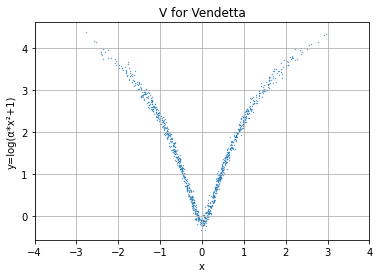

In [2]:
import matplotlib.pyplot as plt

#Plot created data
plt.scatter(x,y,s = 0.1)
plt.grid()
plt.title('V for Vendetta')
plt.xlabel('x')
plt.ylabel('y=log(α*x²+1)')
plt.xlim([-4, 4])
plt.show


# Polynomial regression with math

In [3]:
#math code here (low to high dimension mapping, fitting and predict with linear algebra)

In [4]:
x1 = x
x2 = x**2

In [5]:
X = np.column_stack((x1,x2))
X_b = np.c_[np.ones((n, 1)), X]
X_b

array([[ 1.        , -0.16057619,  0.02578471],
       [ 1.        ,  2.76478906,  7.64405857],
       [ 1.        ,  0.15876097,  0.02520504],
       ...,
       [ 1.        ,  0.93549071,  0.87514287],
       [ 1.        , -0.7930962 ,  0.62900158],
       [ 1.        , -0.82541238,  0.6813056 ]])

In [6]:
#We do linear regression on x1 and x2 mapped higher dimension space with normal equation with new y 
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_new)
print('[beta0, beta1, beta2] = ', w_estimate)

[beta0, beta1, beta2] =  [ 1.00000000e+00 -1.66533454e-15  1.00000000e+01]


In [7]:
#We put our results in log function since we gotten rid of it above.
y_hat = np.log(X_b.dot(w_estimate))
y_hat

array([2.29401636e-01, 4.34951101e+00, 2.24782564e-01, 1.93803067e+00,
       4.26467063e-01, 1.34333740e+00, 2.71355768e+00, 1.73297830e-01,
       2.37903599e-02, 4.46150381e-01, 1.59201483e+00, 7.14789363e-01,
       8.60721814e-01, 3.37798467e+00, 2.97335673e+00, 9.37313467e-01,
       6.46830475e-02, 2.16115490e+00, 2.50985928e+00, 5.42119118e-02,
       1.40482898e+00, 1.46475677e+00, 3.32061908e+00, 1.98465472e+00,
       1.01893144e+00, 8.45853738e-01, 1.32636136e+00, 3.80602589e-04,
       5.21647306e-01, 4.03428114e+00, 3.39037461e+00, 9.76364121e-01,
       2.20721082e+00, 3.10397710e+00, 2.84010423e+00, 2.02677853e+00,
       2.42584558e+00, 2.18406089e+00, 2.08632909e-01, 2.72956022e+00,
       2.67095172e+00, 2.37277230e+00, 1.92189721e+00, 4.08124679e+00,
       2.74798847e+00, 1.68558246e+00, 1.27168718e+00, 1.31174463e+00,
       2.58394817e+00, 4.15712674e-01, 2.36760401e+00, 2.54587156e+00,
       2.61845517e+00, 3.07702004e+00, 1.10809050e-01, 1.26174341e-03,
      

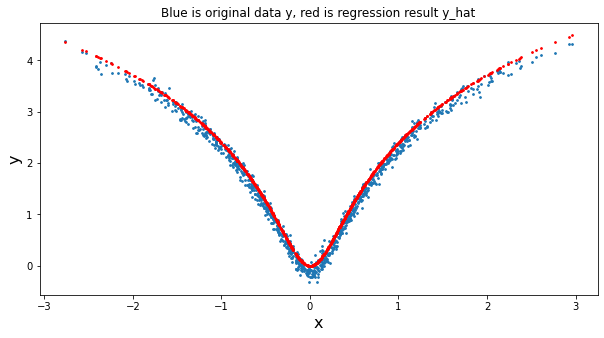

In [8]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

# Polynomial regression with PolynomialFeatures 

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_input = x[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)

print(x_mapped)

[[ 1.         -0.16057619  0.02578471]
 [ 1.          2.76478906  7.64405857]
 [ 1.          0.15876097  0.02520504]
 ...
 [ 1.          0.93549071  0.87514287]
 [ 1.         -0.7930962   0.62900158]
 [ 1.         -0.82541238  0.6813056 ]]


In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_mapped, y_new)

# Predicting values using our trained model
y_hat = np.log(regressor.predict(x_mapped))

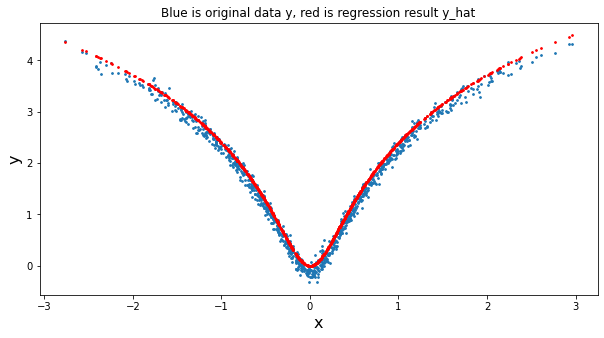

In [11]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

# Polynomial regression with Pipeline

In [12]:
#pipline code here
from sklearn.preprocessing import PolynomialFeatures

In [13]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = x[:,np.newaxis]
poly_regression.fit(x_input, y_new)
y_hat = np.log(poly_regression.predict(x_input))

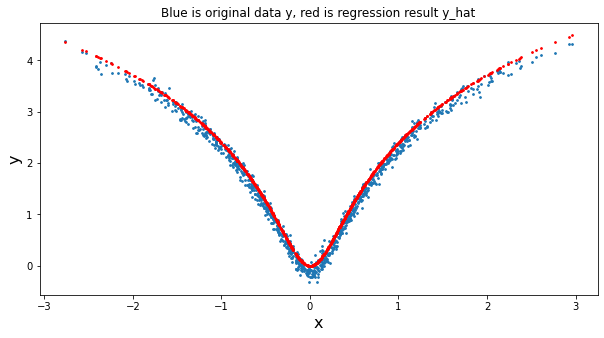

In [14]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()